In [173]:
# Date: 11 May 2024
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from statsmodels.tsa.stattools import adfuller

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.ar_model import AutoReg
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.ar_model import AutoReg

from sklearn import linear_model

import pandas as pd
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA


ACF Values: [ 1.          0.36803279 -0.08360656 -0.37131148 -0.41311475]


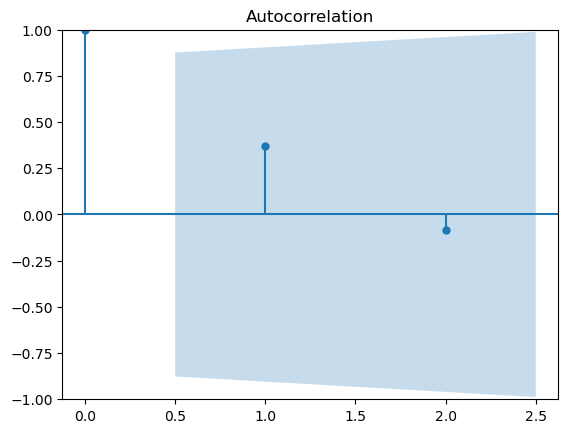

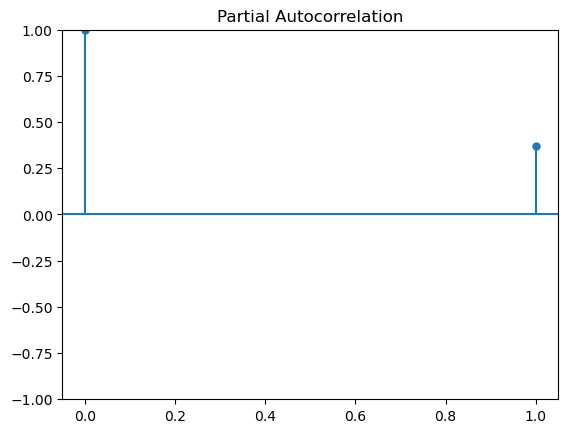

In [146]:
data = {
    "Month": ["January", "February", "March", "April", "May"],
    "Sales": [2, 4, 6, 8, 11]
}
df = pd.DataFrame(data)


acf_values = acf(df['Sales'], fft=False, nlags=4)  # Using non-FFT method, nlags=4 for all possible lags
print("ACF Values:", acf_values)
plot_acf(data['Sales'], lags= 2);
plot_pacf(data['Sales'], lags= 1);

<StemContainer object of 3 artists>

Text(0.5, 1.0, 'Partial Autocorrelation Function')

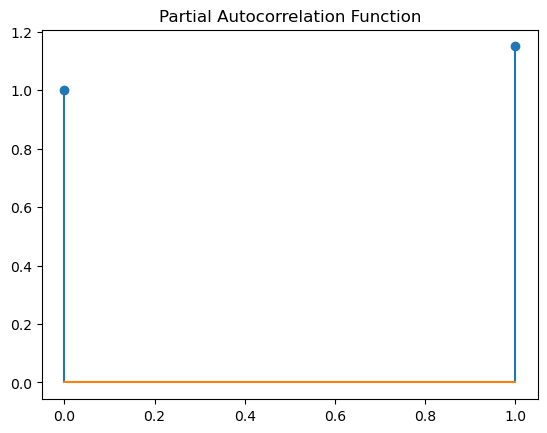

<statsmodels.tsa.ar_model.AutoReg object at 0x79fdca023c50> __________


In [147]:
lags_pacf = pacf(df['Sales'], nlags=1, method='ols')  # We limit lags because of small data size
plt.stem(lags_pacf, linefmt='-', markerfmt='o', basefmt="-")
plt.title('Partial Autocorrelation Function')
plt.show()

model = AutoReg(df['Sales'], lags=1)
model_fitted = model.fit()

print(model, '__________')

In [148]:
# Forecast the next month's sales
forecast = model_fitted.predict(start=len(df['Sales']), end=len(df['Sales']), dynamic=False)
print(f"Forecast for June: {forecast.values[0]:.2f} units")

Forecast for June: 14.15 units


In [154]:
data = {
    "Month": ["January", "February", "March", "April", "May"],
    "Sales": [4, 4, 4, 4, 0, 1]
}

sales = df['Sales']

result = adfuller(sales)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))


ADF Statistic: 1.732051
p-value: 0.998204
Critical Values:
	1%: -7.355
	5%: -4.474
	10%: -3.127


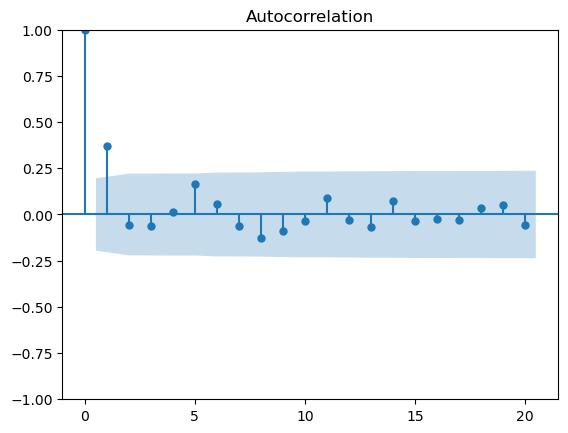

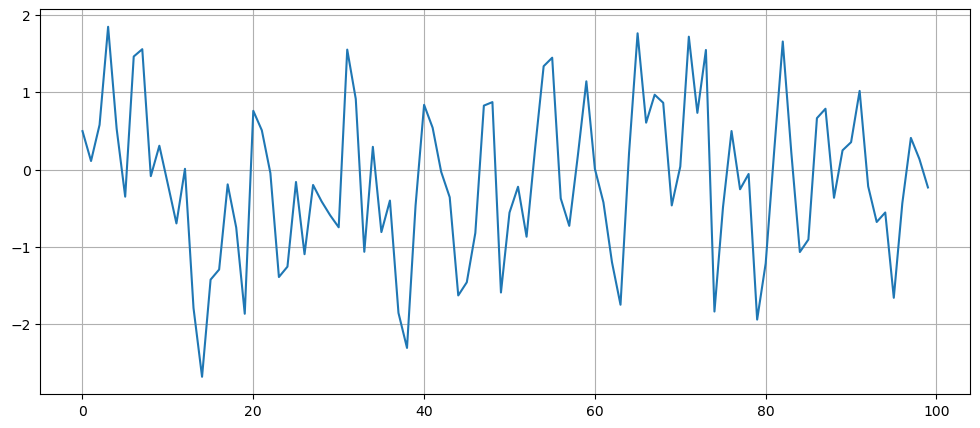

In [171]:
np.random.seed(42)  
n = 100  
theta = 0.5  
mu = 0  

errors = np.random.normal(0, 1, n)

X = np.zeros(n)

X[0] = mu + errors[0]  

for t in range(1, n):
    X[t] = mu + errors[t] + theta * errors[t-1]

ts = pd.Series(X)

# print(ts)

print("       ")
print("")
plot_acf(ts, lags= 20);


plt.figure(figsize=(12, 5))
plt.plot(ts, label='MA(1) Series')
plt.grid(True)
plt.show();







<Figure size 1200x500 with 0 Axes>

Text(0.5, 1.0, 'Generated MA(1) Time Series')

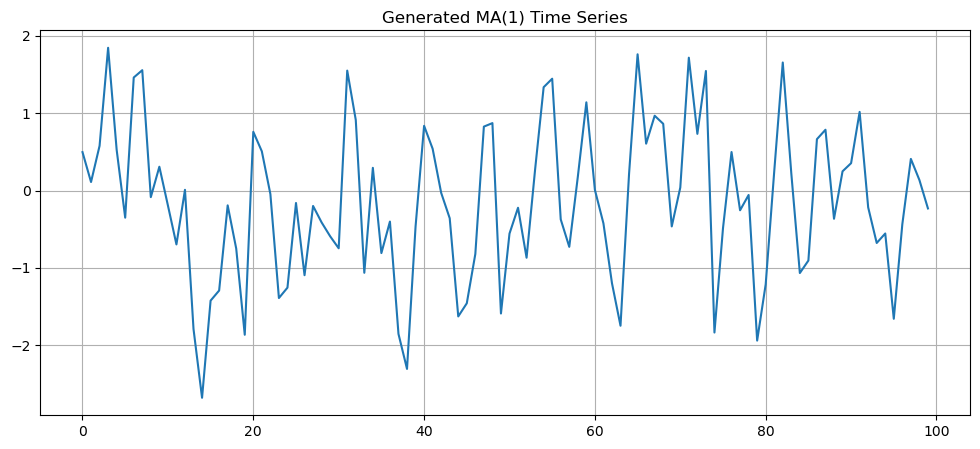

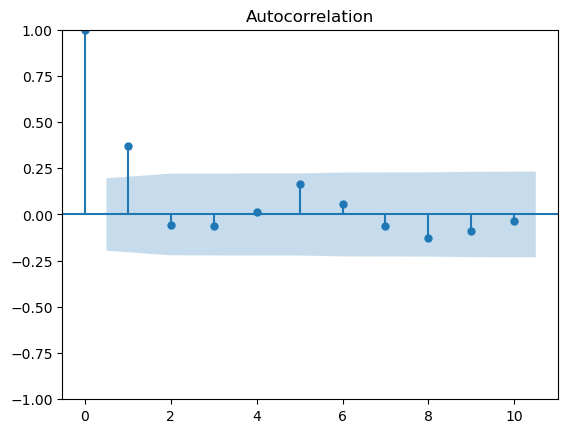

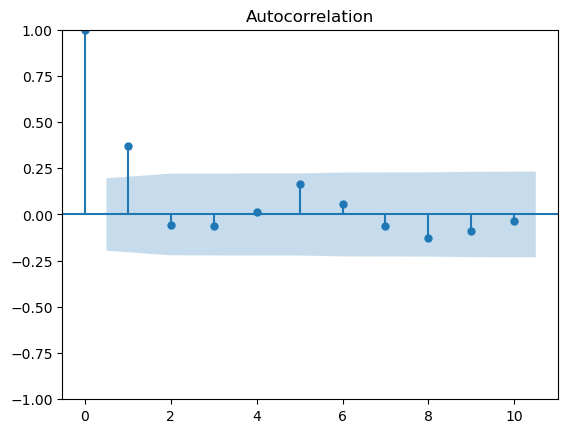

In [176]:
plt.figure(figsize=(12, 5))
plt.plot(ts, label='MA(1) Series')
plt.title('Generated MA(1) Time Series')
plt.grid(True)
plt.show()

# Plot the ACF
plot_acf(ts, lags=10)
plt.show()



<Figure size 1200x500 with 0 Axes>

Text(0.5, 1.0, 'Generated MA(1) Time Series')

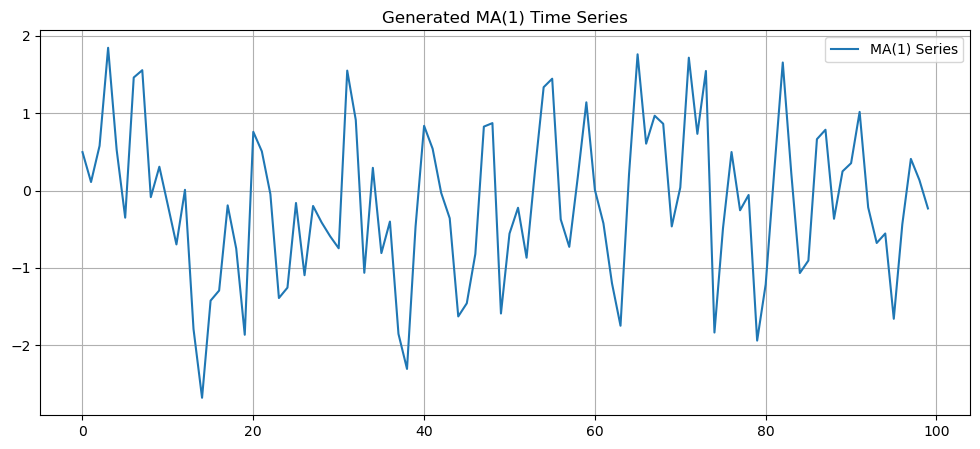

In [179]:
np.random.seed(42)
n = 100
theta = 0.5
mu = 0

errors = np.random.normal(0, 1, n)
X = np.zeros(n)
X[0] = mu + errors[0]

for t in range(1, n):
    X[t] = mu + errors[t] + theta * errors[t-1]

ts = pd.Series(X)

# Plot the series
plt.figure(figsize=(12, 5))
plt.plot(ts, label='MA(1) Series')
plt.title('Generated MA(1) Time Series')
plt.grid(True)
plt.legend()
plt.show()



In [183]:
forecast_result = fitted_model.get_forecast(steps=1)
forecast = forecast_result.predicted_mean
stderr = forecast_result.se_mean
conf_int = forecast_result.conf_int()

# Output the forecast
print(f"Forecast for next time point: {forecast.iloc[0]:.2f}")  # using iloc for safe access
print(f"95% Confidence interval: {conf_int.values[0]}")

Forecast for next time point: -0.22
95% Confidence interval: [-1.9917748   1.54949308]
